# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [11]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# print(f"Training set shape: {x_train.shape}, Labels shape: {y_train.shape}")
# print(f"Test set shape: {x_test.shape}, Labels shape: {y_test.shape}")
# print(f"Image dimensions: {x_train.shape[1:]}")  # 32x32x3
# print(f"Number of classes: {len(np.unique(y_train))}")

# # Display some sample images from the training set
# fig, axes = plt.subplots(1, 5, figsize=(12, 3))
# for i, ax in enumerate(axes):
#     ax.imshow(x_train[i])
#     ax.axis("off")
# plt.show()

In [12]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


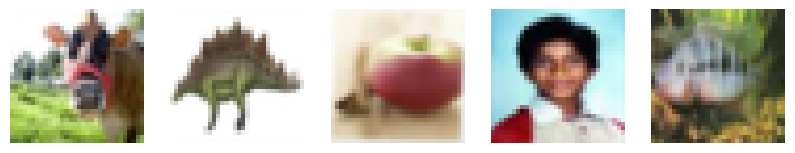

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.axis("off")
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Step 1: Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 2: One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Step 3: Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the processed data
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (40000, 32, 32, 3), y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3), y_val shape: (10000, 100)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crosse: it is suitable when labels are one-hot encoded. 
- <b>Optimizer:</b> Adam. because it surpass the SGD even with using momentoum. I believe that Adam is suitable for trainig more complex data than we had in lab_1. 

In [16]:
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\hosse339\AppData\Local\anaconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [17]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.0389 - loss: 4.3600 - val_accuracy: 0.1638 - val_loss: 3.5497
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.1491 - loss: 3.5706 - val_accuracy: 0.2462 - val_loss: 3.1184
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.2139 - loss: 3.2029 - val_accuracy: 0.2989 - val_loss: 2.8632
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.2608 - loss: 2.9637 - val_accuracy: 0.3250 - val_loss: 2.7218
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2972 - loss: 2.7819 - val_accuracy: 0.3225 - val_loss: 2.7280
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3299 - loss: 2.6188 - val_accuracy: 0.3584 - val_loss: 2.5420
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3513 - loss: 2.4893 - val_accuracy: 0.3630 - val_loss: 2.5111
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3765 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 34%. However, the training process should be stopped in epoche 11, because after that the training loss countinue to decrease while the validation loss started to increase that is a sign of overfitting and reducung the classification performance on test data. 
- <b>Other metric:</b> f1-measure 
- <b>Reason for selection:</b> If the number of labels in each class is way different and the dataset is imbalanced, then accuracy might be misleading. Instead, f-measure provides a blanced classification performance. 
- <b>Value of metric:</b> 34%
- <b>Interpretation of metric value:</b> In this case the value of accuracy and f-measure are approximatly the same suggesting that the dataset might be relatively balanced. However, low f-measure indicate that the classification performance is not good and the model struggle in finding suitable features/ ( abstracted in weithes and biases ) through training process. Possibly because the dimention of the NN is not large enouph to be able to learn the soffostication of the problem, or the number of training samples are not adequet.  

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

from sklearn.metrics import f1_score

# Convert y_test from one-hot encoding to class labels
y_test_class = np.argmax(y_test, axis=1)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate F1-score
f1 = f1_score(y_test_class, y_pred_class, average='macro')
print("F1-score: ", f1)


313/313 - 2s - 7ms/step - accuracy: 0.3470 - loss: 4.7700
Test accuracy: 34.70%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
F1-score:  0.34514200082447205


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

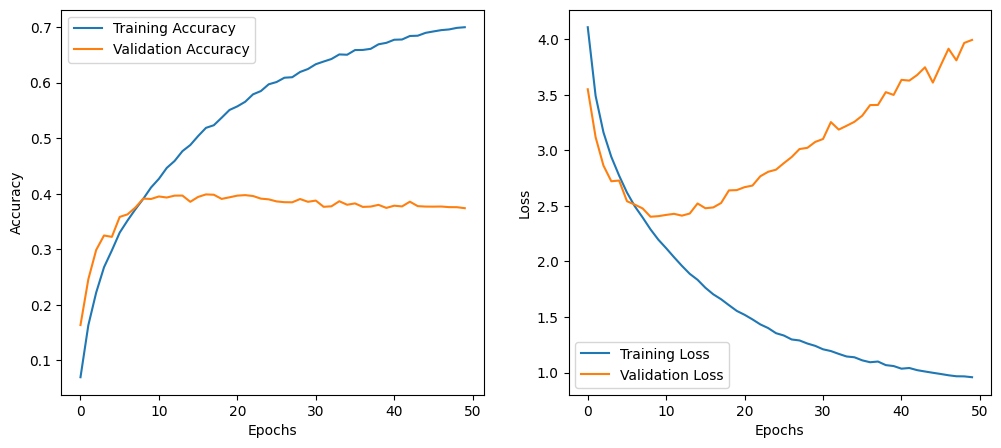

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
By adding more convolutional layers, the model can learn more complex and abstract features, potentially improving its ability to classify images. Deeper networks have a greater capacity to learn from data, especially when working with image data which contains 100 different classes. Adding more layers can help the model learn increasingly higher-level features.

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

def build_improved_model():
    model = keras.Sequential([
        # First Conv Block
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Second Conv Block
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # Third Conv Block
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        # Fourth Conv Block
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

# Create the improved model
model = build_improved_model()

# Display the summary
model.summary()

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,007,012 (19.10 MB)

 Trainable params: 5,003,172 (19.09 MB)

 Non-trainable params: 3,840 (15.00 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [29]:

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 227s 178ms/step - accuracy: 0.0680 - loss: 4.2229 - val_accuracy: 0.1618 - val_loss: 3.5402
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 152ms/step - accuracy: 0.1809 - loss: 3.4380 - val_accuracy: 0.2314 - val_loss: 3.2201
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 135ms/step - accuracy: 0.2534 - loss: 3.0218 - val_accuracy: 0.3346 - val_loss: 2.6139
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 122ms/step - accuracy: 0.3056 - loss: 2.7240 - val_accuracy: 0.3744 - val_loss: 2.4286
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 118ms/step - accuracy: 0.3638 - loss: 2.4567 - val_accuracy: 0.4294 - val_loss: 2.1741
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 121ms/step - accuracy: 0.4143 - loss: 2.2251 - val_accuracy: 0.4487 - val_loss: 2.0532
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 122ms/step - accuracy: 0.4413 - loss: 2.0877 - val_accuracy: 0.4722 - val_loss: 1.9647
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 156s 125ms/step - ac

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

from sklearn.metrics import f1_score

# Convert y_test from one-hot encoding to class labels
y_test_class = np.argmax(y_test, axis=1)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate F1-score
f1 = f1_score(y_test_class, y_pred_class, average='macro')
print("F1-score: ", f1)


313/313 - 13s - 43ms/step - accuracy: 0.6043 - loss: 2.1522
Test accuracy: 60.43%
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
F1-score:  0.6035469809000252


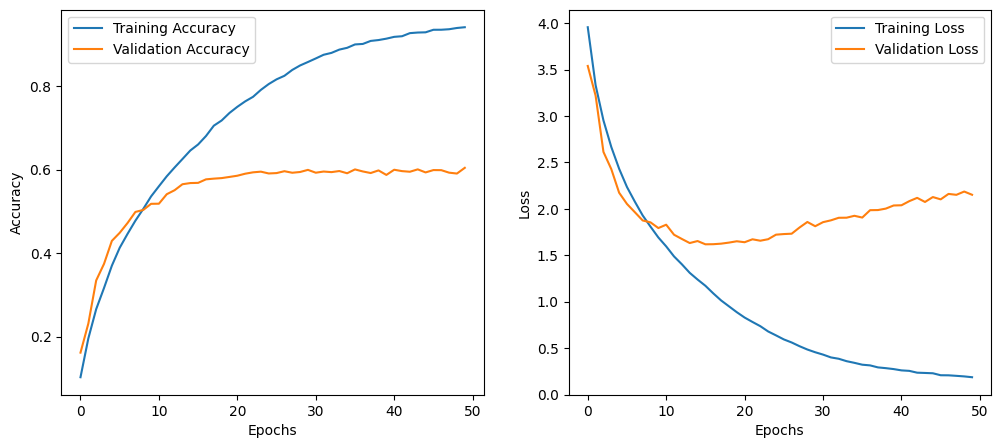

In [31]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
I've made the structure of the network more complex by adding more layers and parameters, allowing it to learn more intricate patterns. Additionally, I used a lower learning rate and batch normalization, which helped improve stability during training. As a result, the model's performance significantly improved, with accuracy and F1-score increasing from around 30% to more than 60%. However, I noticed that training for 50 epochs is excessive, as the best performance seems to be achieved around epochs 11-12.

Despite these improvements, I believe there is still room for further enhancement. One major concern is overfitting, which is evident from the training and validation curves. The training accuracy improves rapidly, but the validation accuracy progress more slowly, indicating that the model is memorizing patterns rather than generalizing well leading to overfitting to training data. To address this, I suggest using regularization techniques  to prevent overfitting and improve generalization.

For future improvements, using a more complex architecture such as ResNet could enhance feature extraction and better classification performance. Additionally, fine-tuning a pretrained model may leads to even better results. Moreoverll, tuning of hyperparameters can further optimize the model’s classification performance.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.